In [1]:
import scheduling
import matplotlib

font = {"size": 15}

matplotlib.rc("font", **font)

Zunächst wollen wir uns das Scheduling für die beiden in der Aufgabe aufgestellten Pläne einmal ansehen. Dazu laden wir zunächst die Daten aus einer CSV-Datei: 

In [2]:
nonSorted = scheduling.read_times("NichtSortiert.csv")
Sorted = scheduling.read_times("Sortiert.csv")

Im nächsten Schritt wollen wir uns die einzelnen Aufträge anzeigen lassen: 

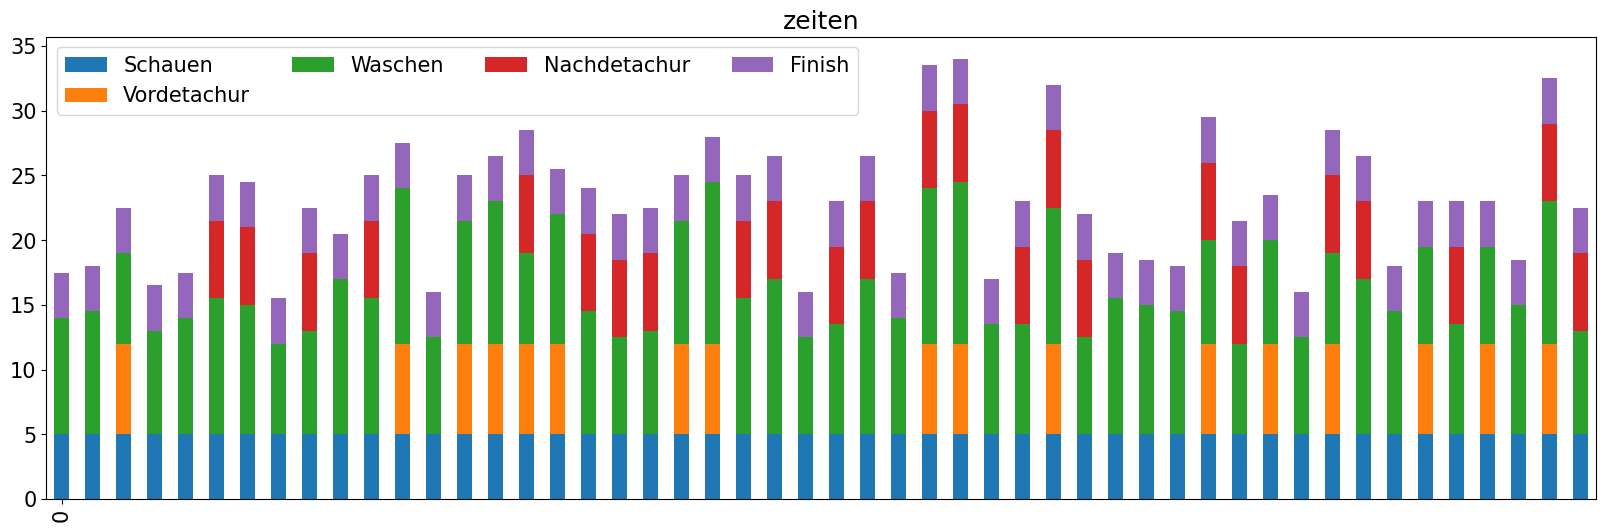

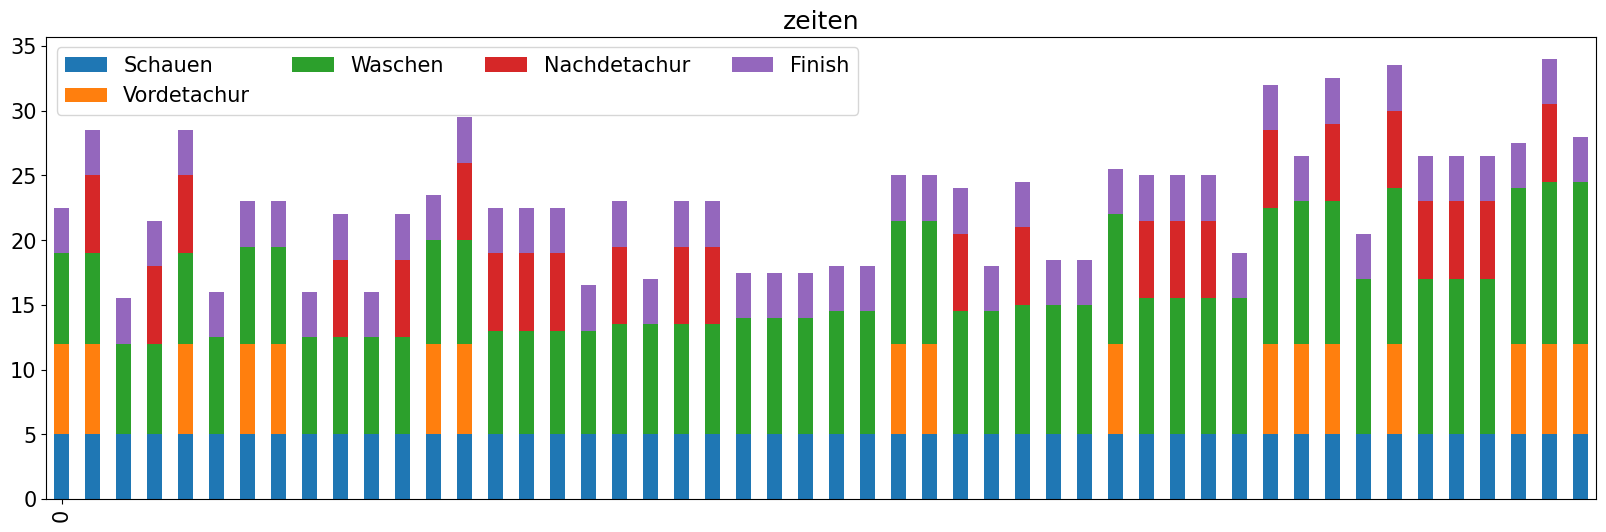

In [3]:
scheduling.visualize_times(nonSorted)
scheduling.visualize_times(Sorted)

Nun wollen wir uns aber die Schedules für beide Fälle ansehen. Dabei erzeugen wir zunächst ein Wäscherei-Objekt für unsere Zeiten. Dabei können wir z.B. angeben, wie viele ArbeiterInnen es geben soll und wie groß der Overhead zum Verteilen ist:

In [4]:
nonsort_schedule = scheduling.waescherei(zeiten=nonSorted, nworkers=4, overhead=0.2)
sort_schedule = scheduling.waescherei(zeiten=Sorted, nworkers=4, overhead=0.2)

Danach wollen wir den Schedule für beide Fälle laufen lassen.

In [5]:
nonsort_schedule.run()
sort_schedule.run()

Damit können wir uns nun ansehen, wie die Tasks auf die Prozesse beim dynamischen Schedule verteilt werden: 

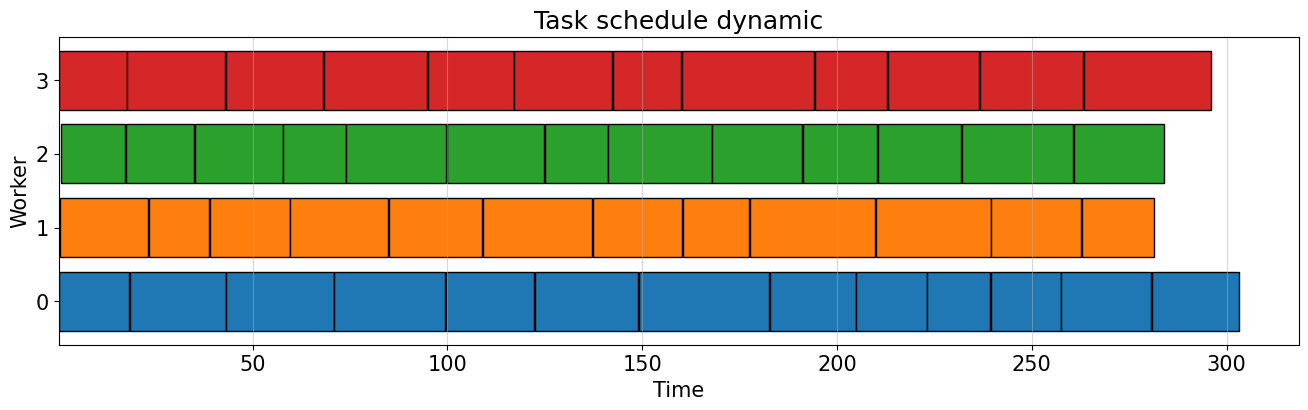

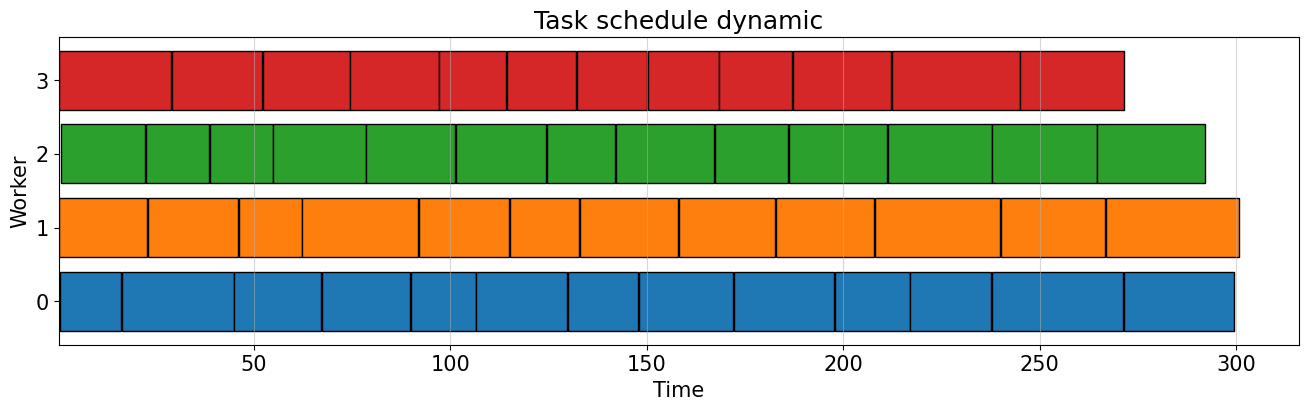

In [6]:
nonsort_schedule.visualize_schedule_dynamic()
sort_schedule.visualize_schedule_dynamic()

Zum Vergleich einmal der statische Schedule: 

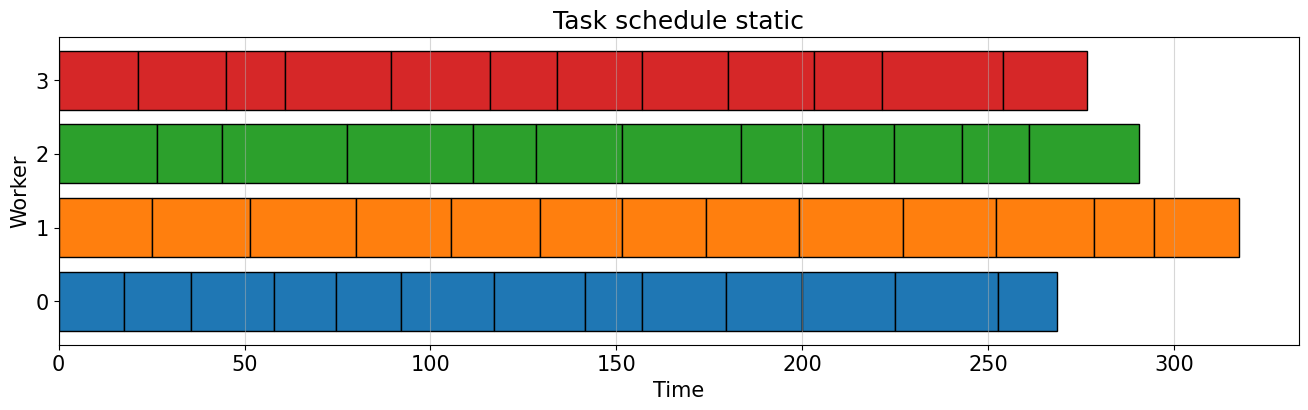

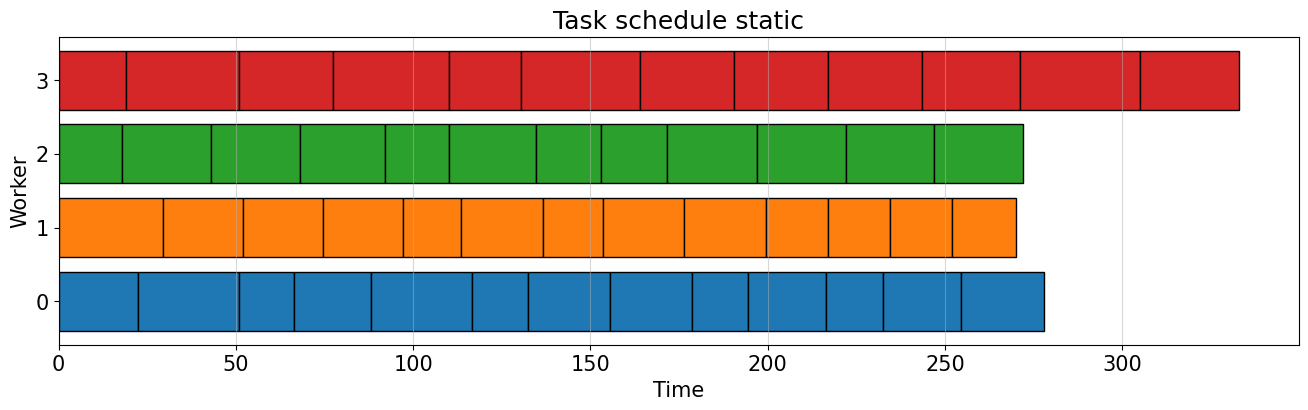

In [7]:
nonsort_schedule.visualize_schedule_static()
sort_schedule.visualize_schedule_static()

Wir erzeugen zunächst eine neue Reihe von Daten, die nicht sortiert sind. Wir wollen diesmal nur 20 Wäschestücke und drei ArbeiterInnen. 

In [8]:
neu = scheduling.write_times(N=20, sort=False)

In [9]:
Schedule_neu = scheduling.waescherei(zeiten=neu, nworkers=3, overhead=0.5)

Nun wollen wir sehen, wie sich der Schedule entwickelt. Dafür verwenden wir die Funktion `progress()`, die jeweils nur das nächste Kleidungsstück vergibt und die Anzahl der insgesamt verteilten Kleider zurückgibt, wir plotten dazu jeweils den aktuellen Schedule.
Der Scheduler arbeitet so, dass er, wenn mehrere Worker in der *Queue* sind, zufällig einen auswählt, der den nächsten Auftrag bekommt. Die Vergabe eines Auftrags kostet Zeit (*Overhead*).

scheduling job 0 on worker 2 at time 0.5, [0.0, 0.0, 0.0]
scheduling job 1 on worker 0 at time 1.0, [0.0, 0.0, 34.5]
scheduling job 2 on worker 1 at time 1.5, [23.5, 0.0, 34.5]
scheduling job 3 on worker 1 at time 22.5, [23.5, 22.0, 34.5]
scheduling job 4 on worker 0 at time 24.0, [23.5, 43.5, 34.5]
scheduling job 5 on worker 2 at time 35.0, [49.5, 43.5, 34.5]
scheduling job 6 on worker 1 at time 44.0, [49.5, 43.5, 57.5]
scheduling job 7 on worker 0 at time 50.0, [49.5, 61.0, 57.5]
scheduling job 8 on worker 2 at time 58.0, [74.5, 61.0, 57.5]
scheduling job 9 on worker 1 at time 61.5, [74.5, 61.0, 74.5]
scheduling job 10 on worker 2 at time 75.0, [74.5, 89.0, 74.5]
scheduling job 11 on worker 0 at time 75.5, [74.5, 89.0, 100.0]
scheduling job 12 on worker 1 at time 89.5, [91.0, 89.0, 100.0]
scheduling job 13 on worker 0 at time 91.5, [91.0, 108.0, 100.0]
scheduling job 14 on worker 2 at time 100.5, [115.0, 108.0, 100.0]
scheduling job 15 on worker 1 at time 108.5, [115.0, 108.0, 128.5]

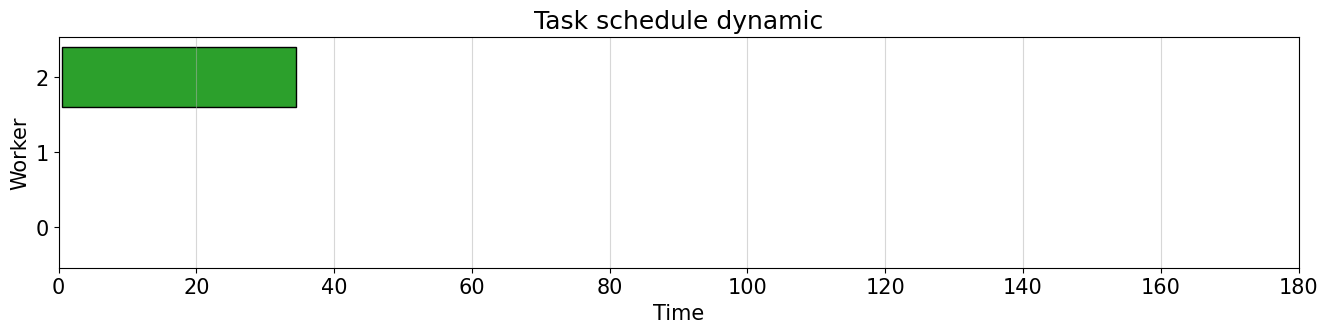

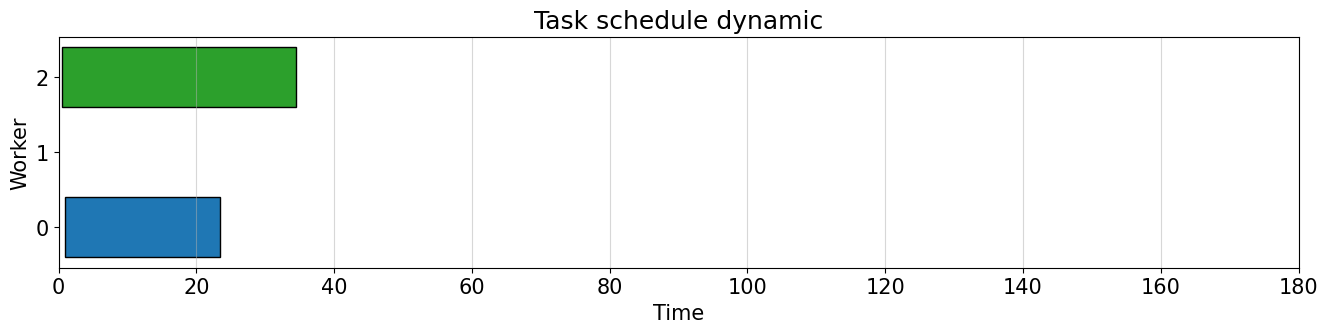

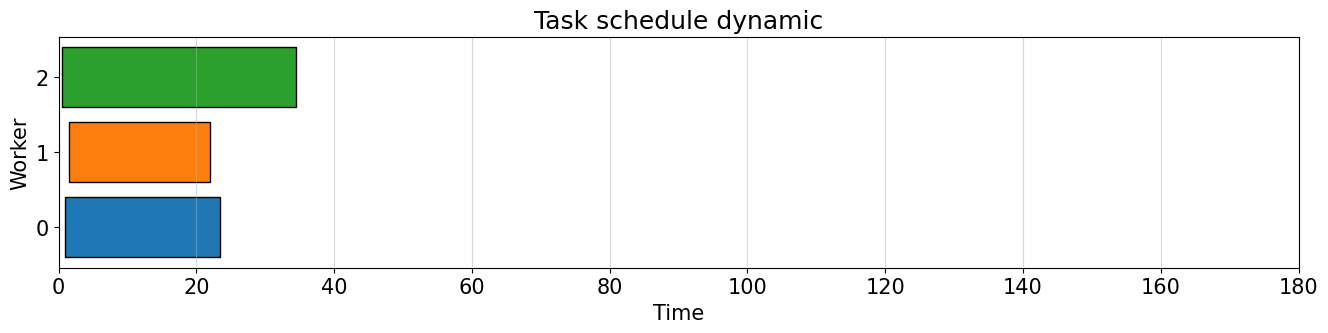

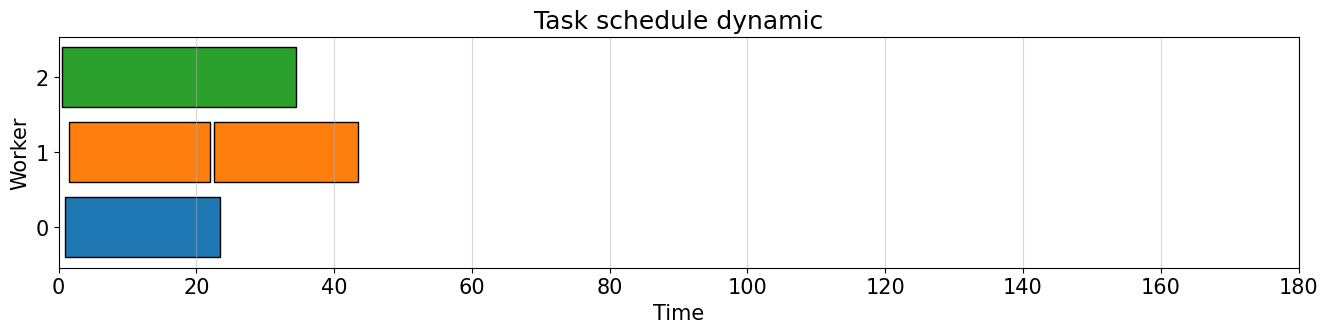

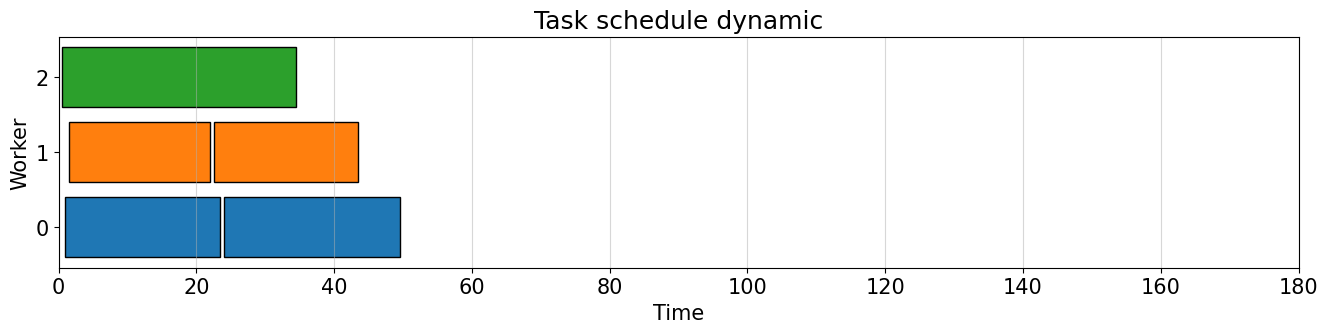

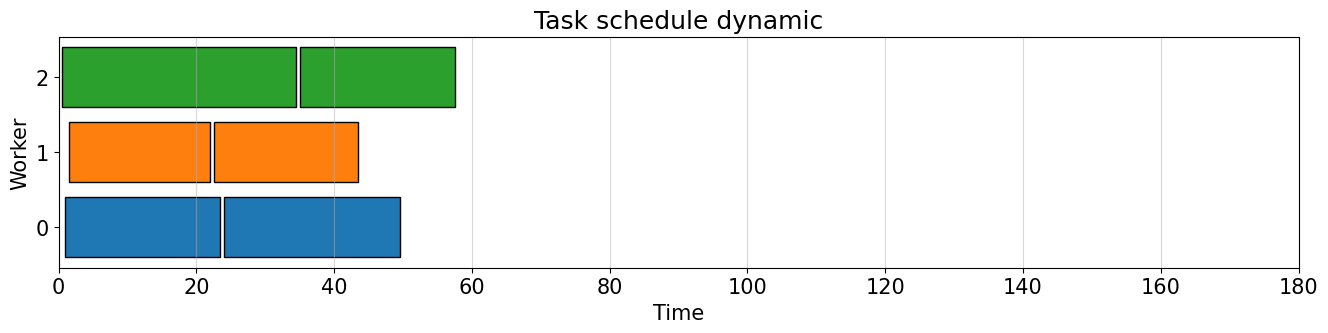

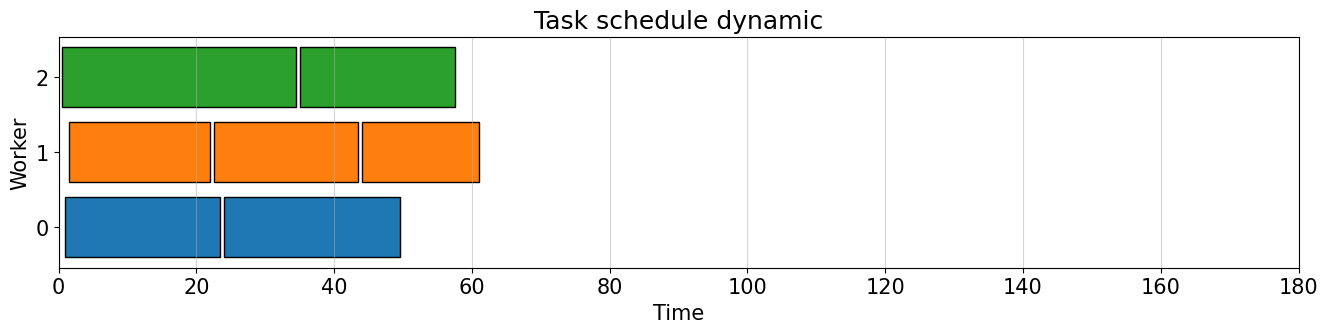

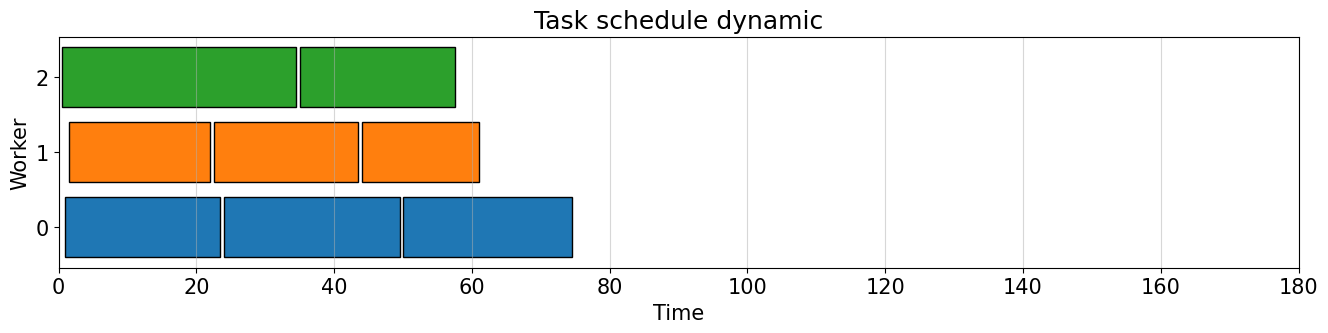

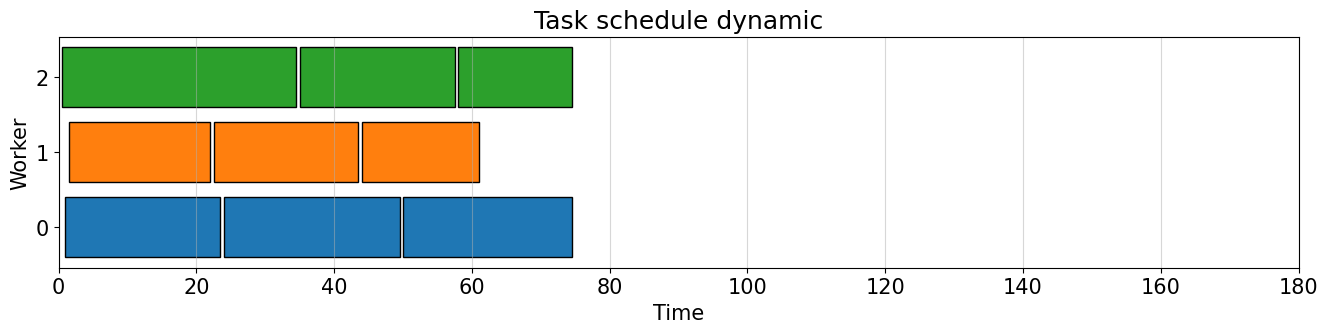

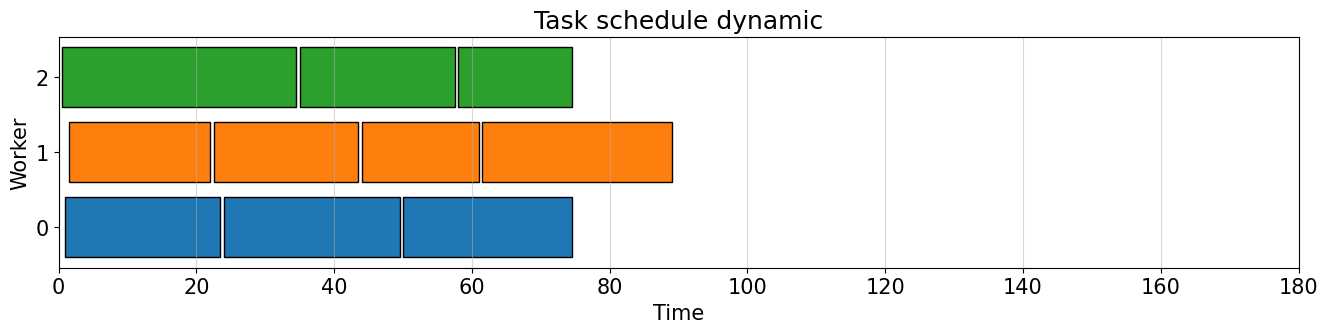

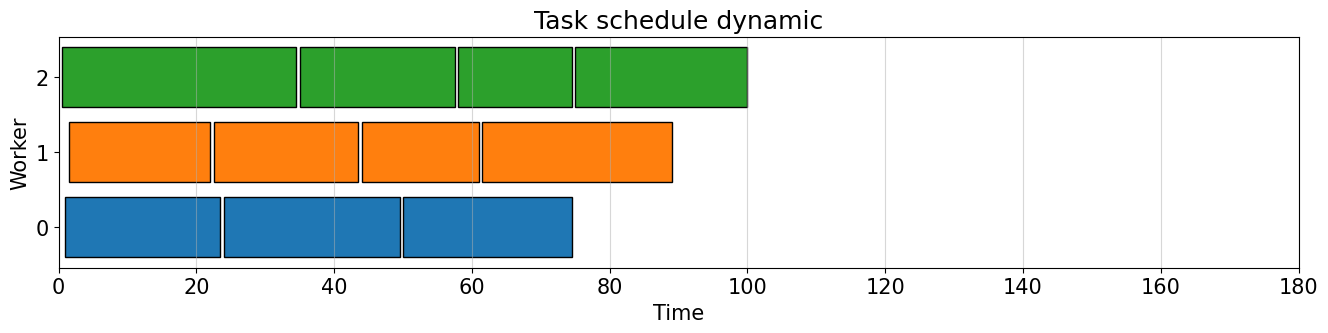

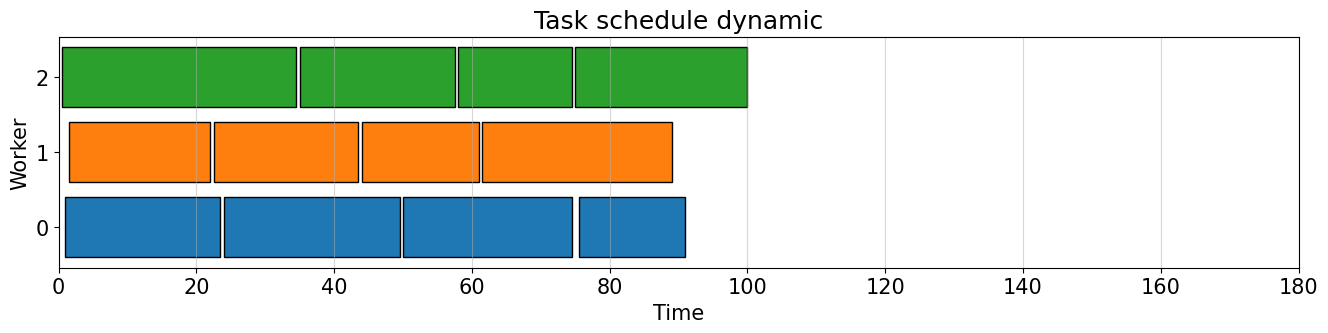

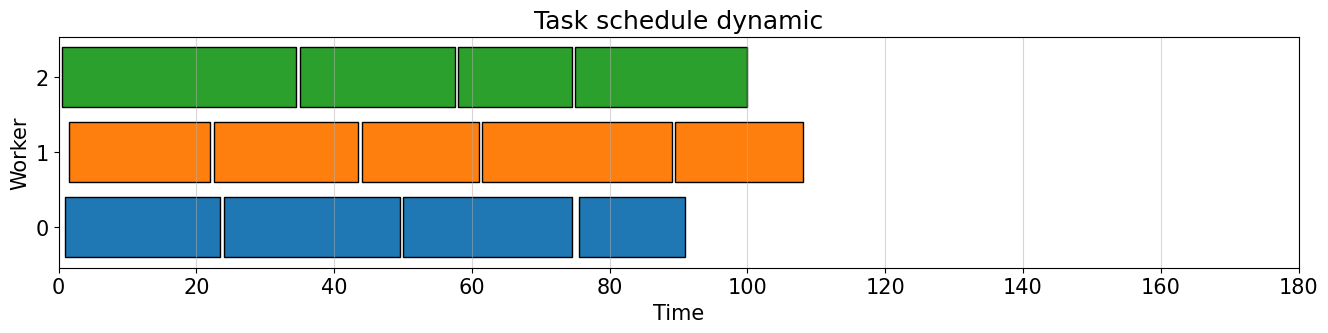

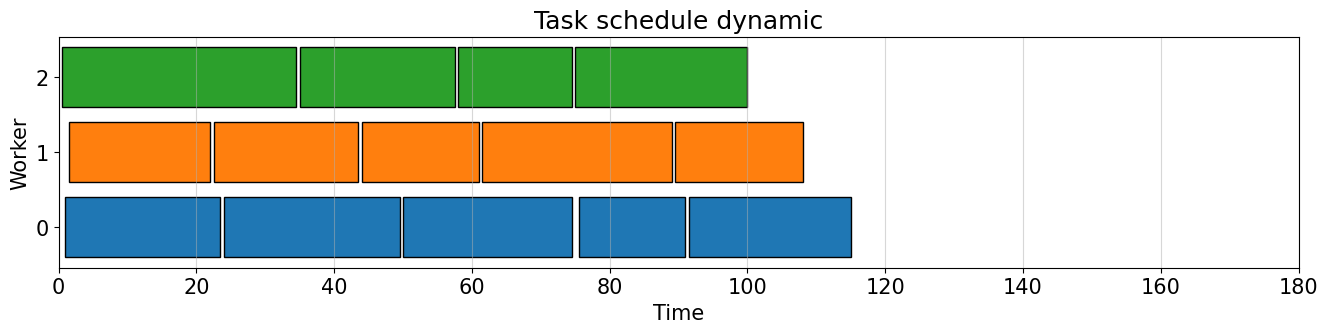

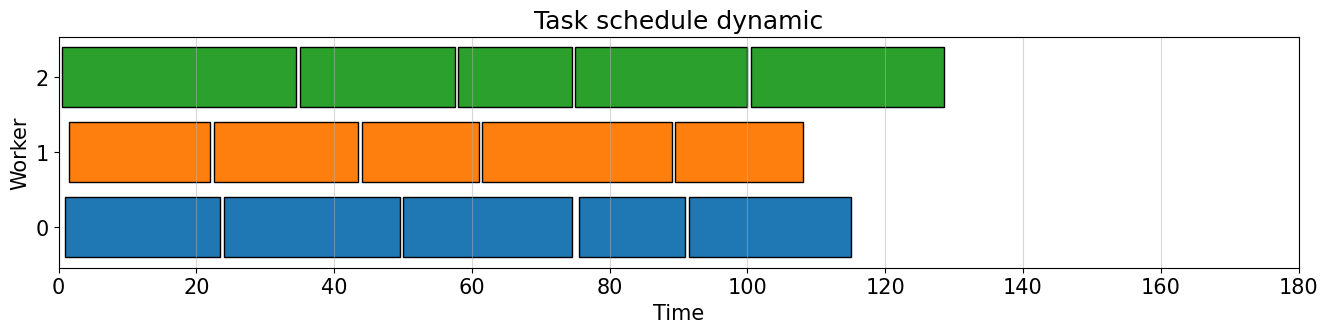

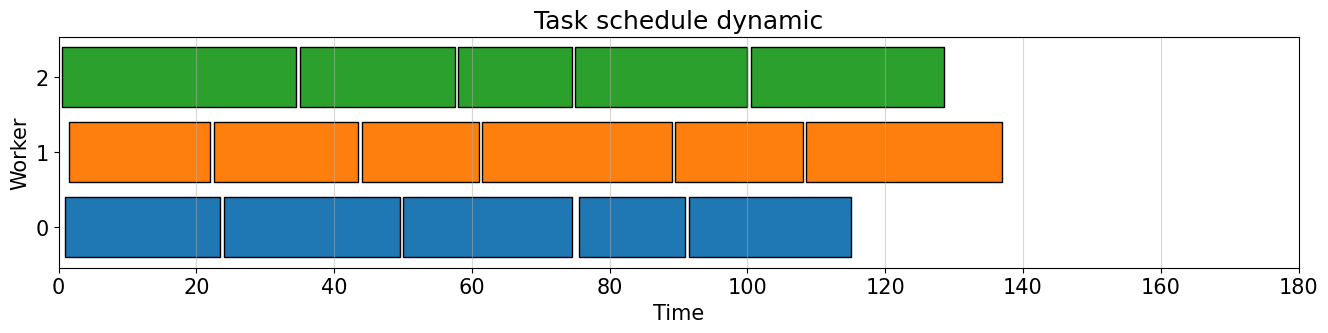

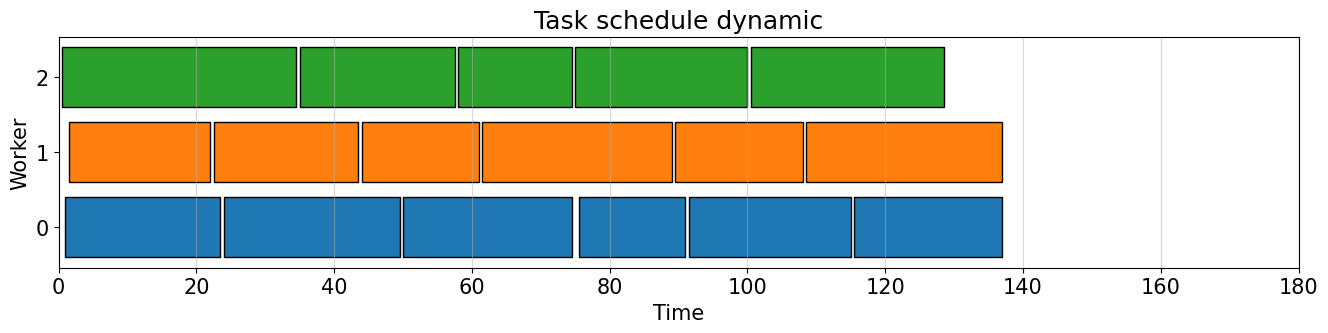

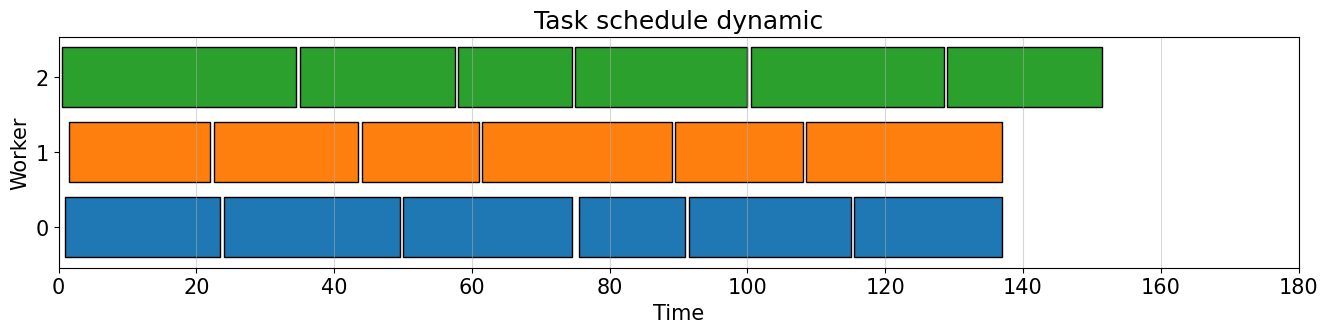

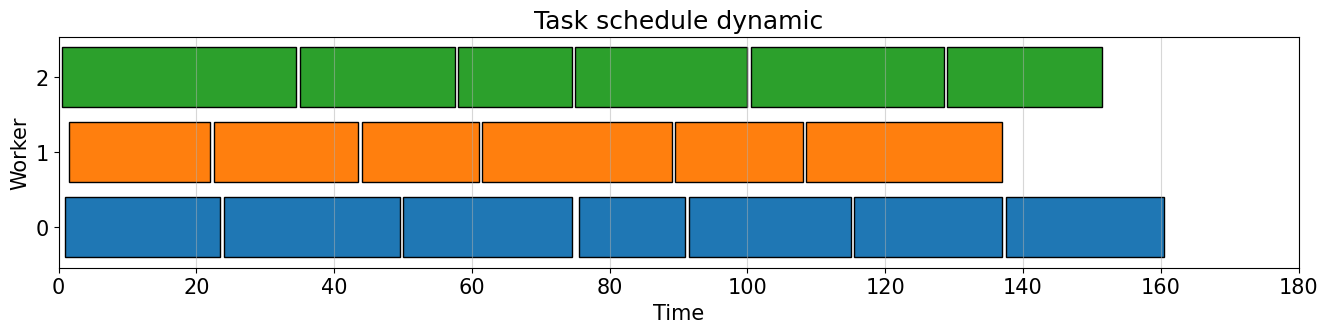

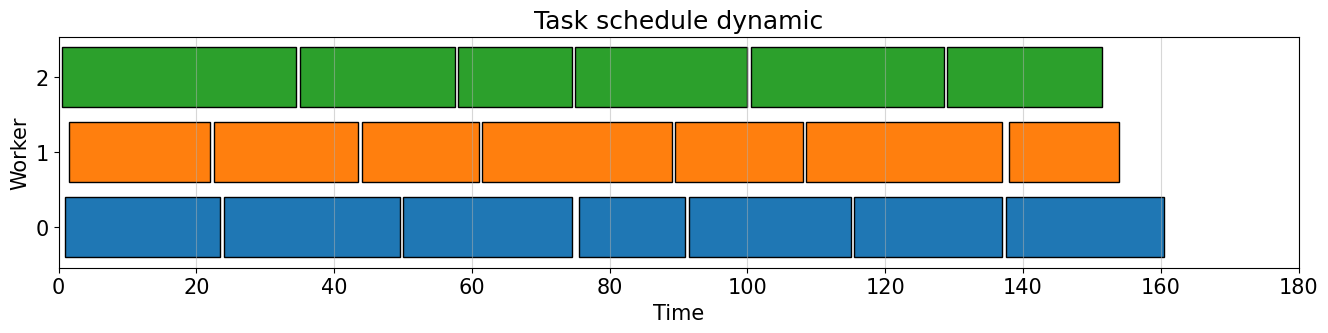

In [10]:
index = 0
while index < 20:
    index = Schedule_neu.progress()
    Schedule_neu.visualize_schedule_dynamic(xlimits=[0,180])

Den statischen Schedule können wir uns auch ansehen.

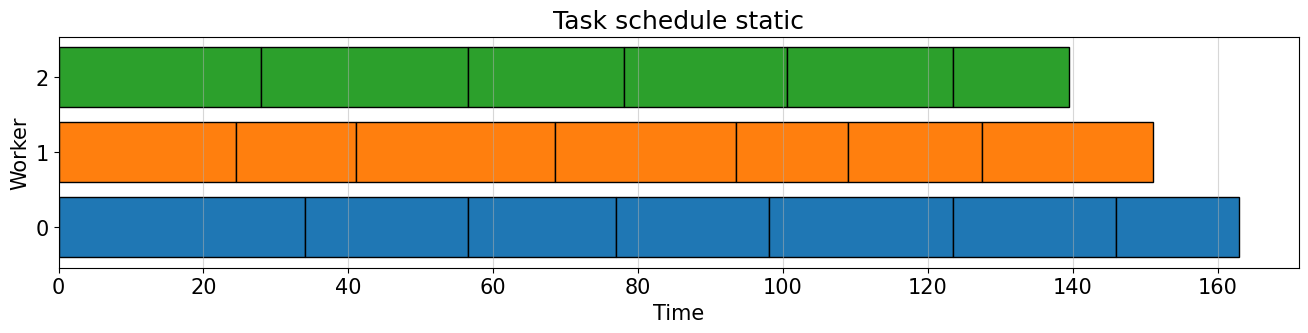

In [11]:
Schedule_neu.visualize_schedule_static()